# Import usual libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# import calssifier libraries

In [4]:
import evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

# read the training data and the agreement and correlation test data

In [5]:
train = pd.read_csv('../Dataset/training.csv')
signal = train[train['signal']==1] #signal labeled events
background = train[train['signal']==0] #background labeled events

In [6]:
agree = pd.read_csv('../Dataset/check_agreement.csv', index_col='id') # load the check agreement data
signal_test = agree[agree['signal']==1] #signal labeled events
background_test = agree[agree['signal']==0] #background labeled events

In [7]:
corr = pd.read_csv('../Dataset/check_correlation.csv', index_col='id') # load the check correlation data

In [182]:
test = pd.read_csv('../Dataset/test.csv', index_col='id') #load the test data

## categorize the features just to be more organized

In [5]:
iso_feat = ['isolationa',
            'isolationb',
            'isolationc',
            'isolationd',
            'isolatione',
            'isolationf',
            'iso']
# 7 track isolation variables and they are integers

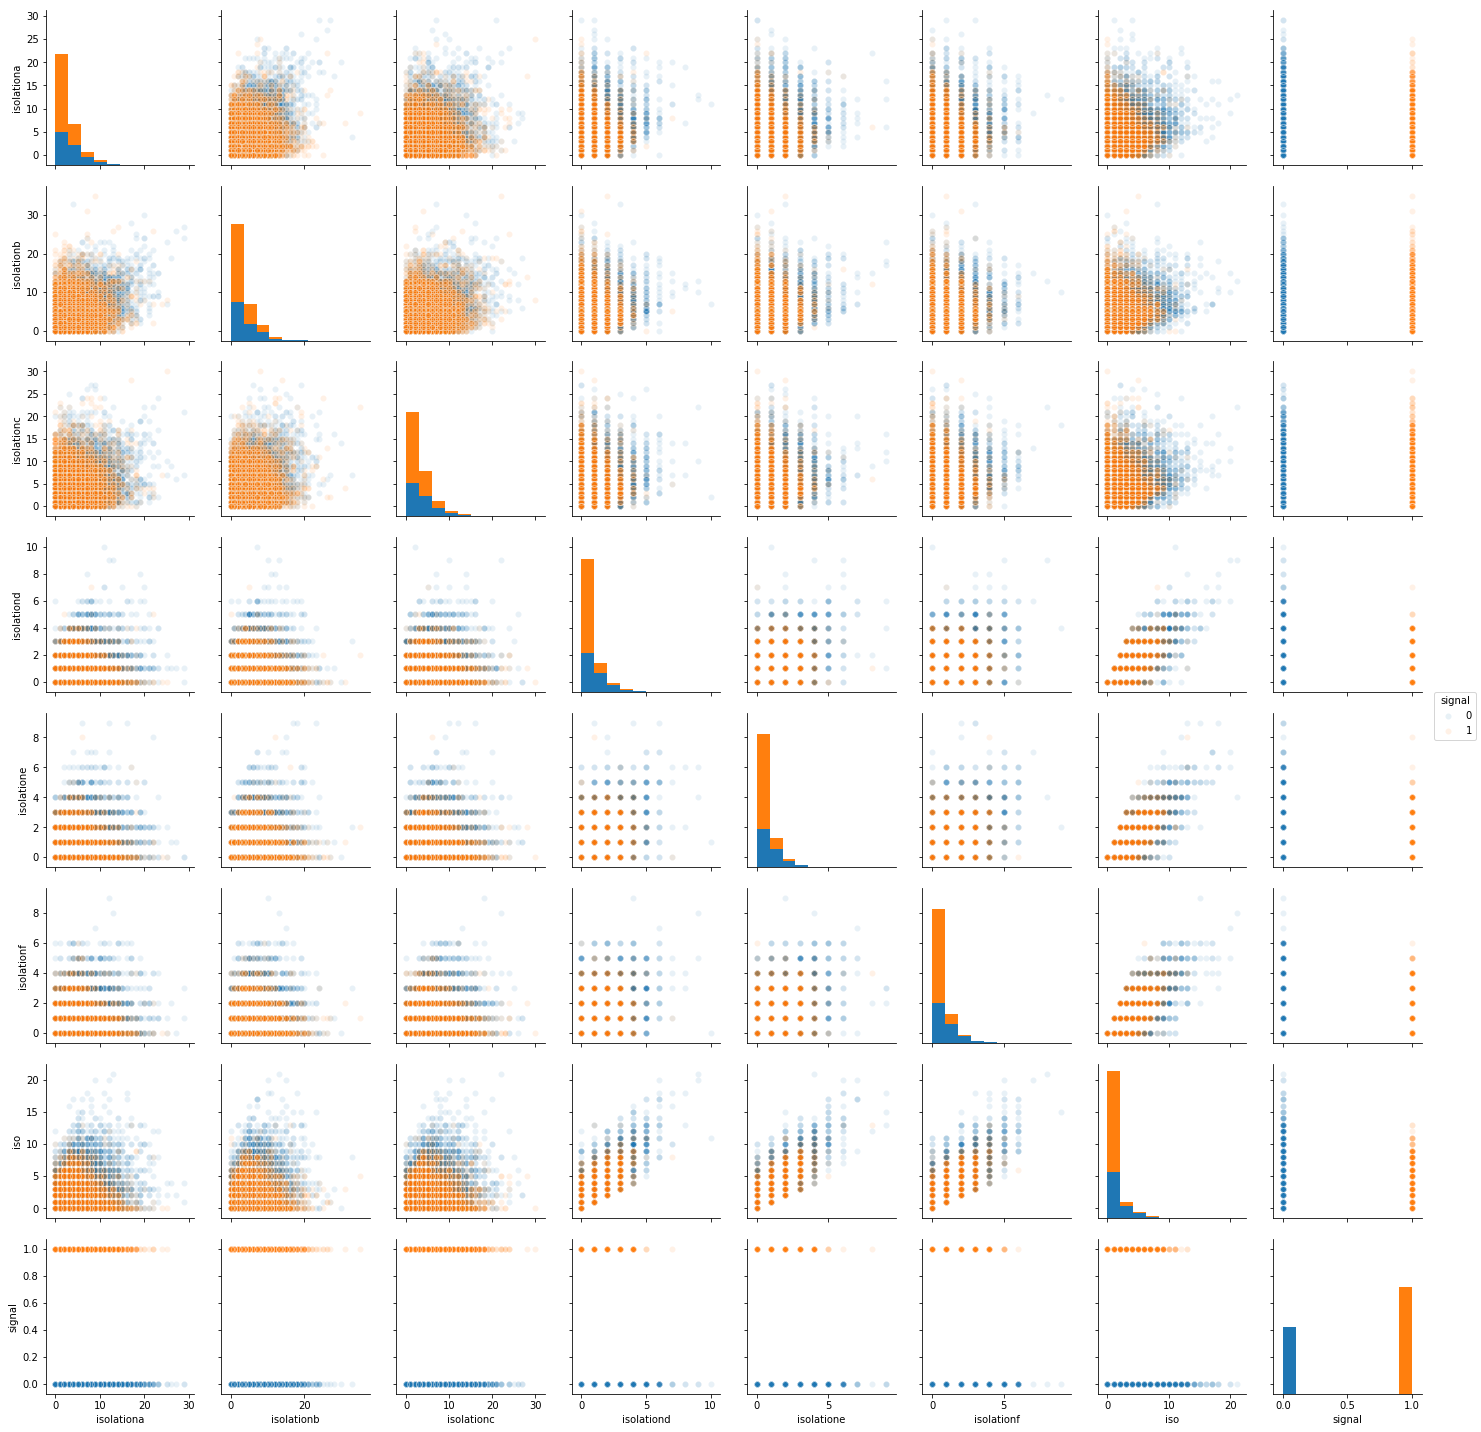

In [6]:
sns.pairplot(data = train[iso_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
# some of them are quite separating
# iso is correlated with isolation(d,e,f)

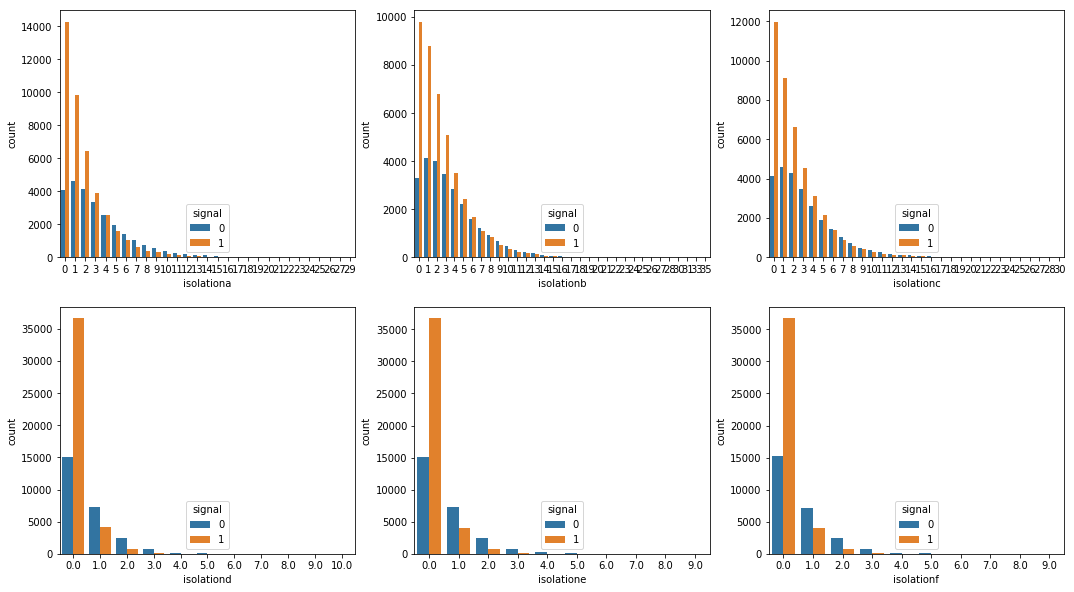

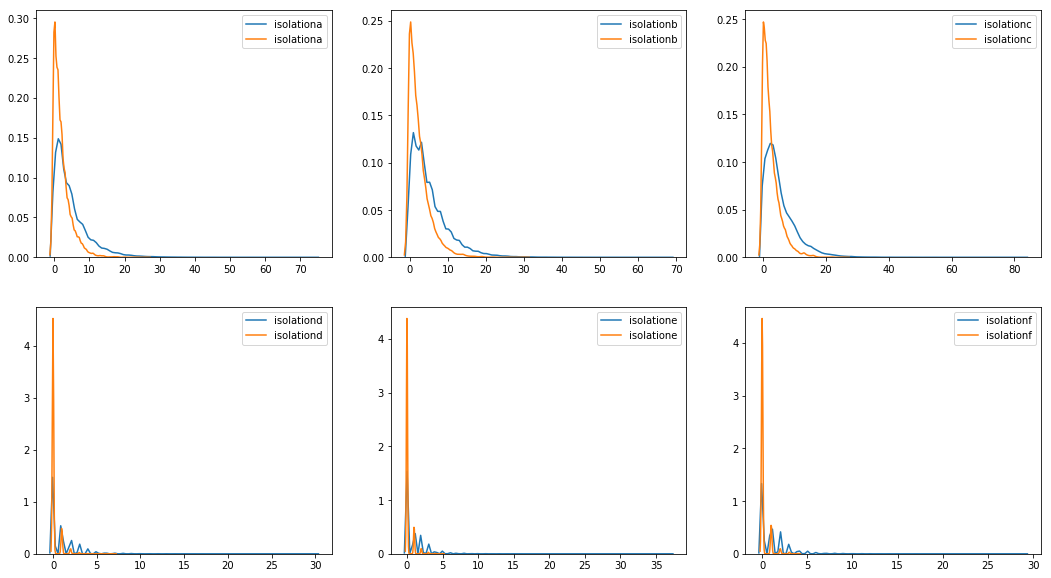

In [32]:
# checking iso dists for \tau->\mu
plt.figure(figsize=(18,10))
for i in range(6):
    plt.subplot(2,3, i+1)
    sns.countplot(data = train, x = iso_feat[i], hue='signal')
# checking iso dists for Ds->\phi\pi
plt.figure(figsize=(18,10))
for i in range(6):
    plt.subplot(2,3, i+1)
    sns.kdeplot(data = background_test[iso_feat[i]])
    sns.kdeplot(data = signal_test[iso_feat[i]])

In [11]:
# shwoing the correlation between iso and isolation(d,e,f)
train[iso_feat].corr()

isolationa  isolationb  isolationc  isolationd  isolatione  \
isolationa    1.000000    0.476636    0.400351    0.352346    0.321944   
isolationb    0.476636    1.000000    0.424429    0.307836    0.334203   
isolationc    0.400351    0.424429    1.000000    0.299188    0.298211   
isolationd    0.352346    0.307836    0.299188    1.000000    0.597632   
isolatione    0.321944    0.334203    0.298211    0.597632    1.000000   
isolationf    0.317621    0.306339    0.332159    0.541270    0.571478   
iso           0.391521    0.374281    0.366723    0.845204    0.856391   

            isolationf       iso  
isolationa    0.317621  0.391521  
isolationb    0.306339  0.374281  
isolationc    0.332159  0.366723  
isolationd    0.541270  0.845204  
isolatione    0.571478  0.856391  
isolationf    1.000000  0.832317  
iso           0.832317  1.000000

In [12]:
CDF_feat = ['CDF1','CDF2','CDF3'] # 3 cone isolation variables (whatever they are)

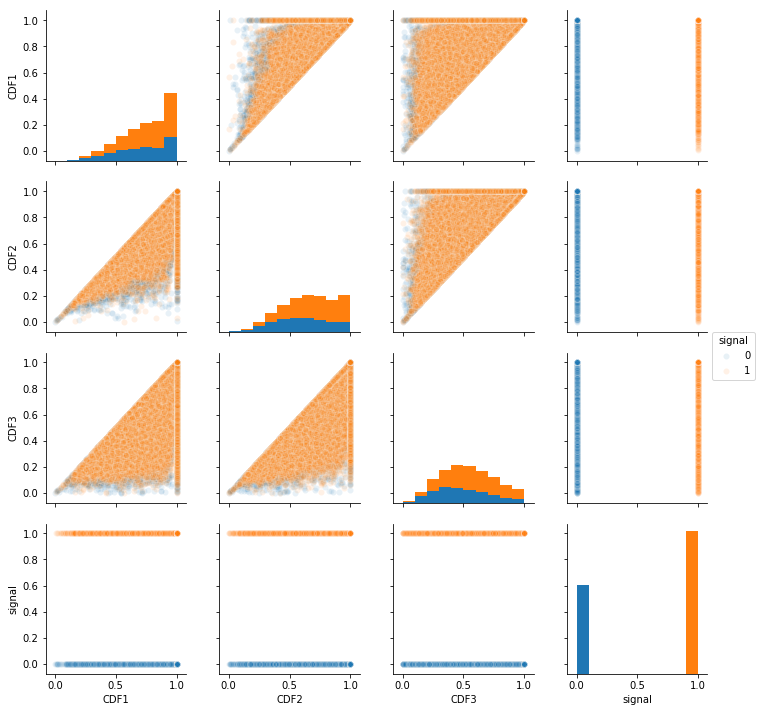

In [13]:
sns.pairplot(data = train[CDF_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#looks like that we always have: 1 > CDF1 > CDF2 > CDF3 > 0
#signal and background have quite differnt dists

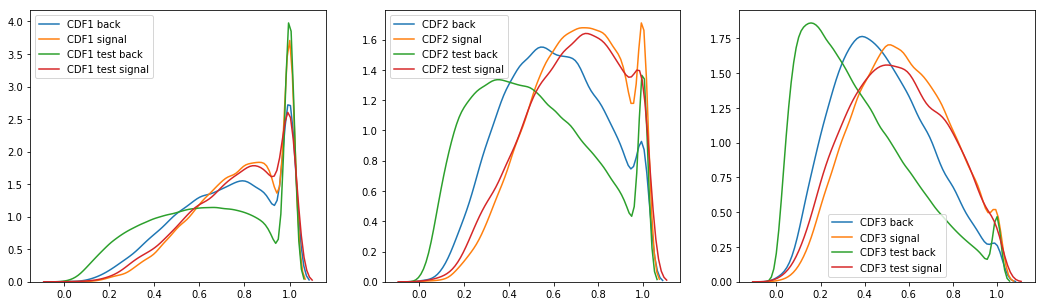

In [37]:
# checking CDF dists
plt.figure(figsize=(18,5))
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.kdeplot(data = background[CDF_feat[i]], label = CDF_feat[i]+' back')
    sns.kdeplot(data = signal[CDF_feat[i]], label = CDF_feat[i]+' signal')
    
    sns.kdeplot(data = background_test[CDF_feat[i]], label = CDF_feat[i]+' test back')
    sns.kdeplot(data = signal_test[CDF_feat[i]], label = CDF_feat[i]+' test signal')
#they all have a spike at 1
#the difference quite large in the test channel too!
#we might need to kick them out

In [16]:
# of data that are exactly on the line CDFi = CDFj
print('total # of data = ',len(train.index))
print('# of data where we have: CDF1 = CDF2:', len(train[(train['CDF1']==train['CDF2'])].index))
print('# of data where we have: CDF2 = CDF3:', len(train[(train['CDF2']==train['CDF3'])].index))
print('# of data where we have: CDF3 = CDF1:', len(train[(train['CDF1']==train['CDF3'])].index))

total # of data =  67553
# of data where we have: CDF1 = CDF2: 19455
# of data where we have: CDF2 = CDF3: 12465
# of data where we have: CDF3 = CDF1: 5057


In [17]:
#they are clearly correlated
train[CDF_feat].corr()

CDF1      CDF2      CDF3
CDF1  1.000000  0.853044  0.657547
CDF2  0.853044  1.000000  0.800137
CDF3  0.657547  0.800137  1.000000

In [18]:
isoBDT_feat = ['ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT']
# 4 IsoBDT track isolation variables. They might be related to other track isolation variables.

In [39]:
#positive isoBDT variables are outliers; kick them out!
train = train[(train['p0_IsoBDT']<0)&(train['p1_IsoBDT']<0)&(train['p2_IsoBDT']<0)&(train['ISO_SumBDT']<0)]
signal = train[train['signal']==1] #signal labeled events (cleaned)
background = train[train['signal']==0] #background labeled events (cleaned)

# do it for the "signal and background agreement test" data too but don't change the main test data
signal_test = signal_test[(signal_test['p0_IsoBDT']<0)&(signal_test['p1_IsoBDT']<0)&
                          (signal_test['p2_IsoBDT']<0)&(signal_test['ISO_SumBDT']<0)]
background_test = background_test[(background_test['p0_IsoBDT']<0)&(background_test['p1_IsoBDT']<0)&
                          (background_test['p2_IsoBDT']<0)&(background_test['ISO_SumBDT']<0)]

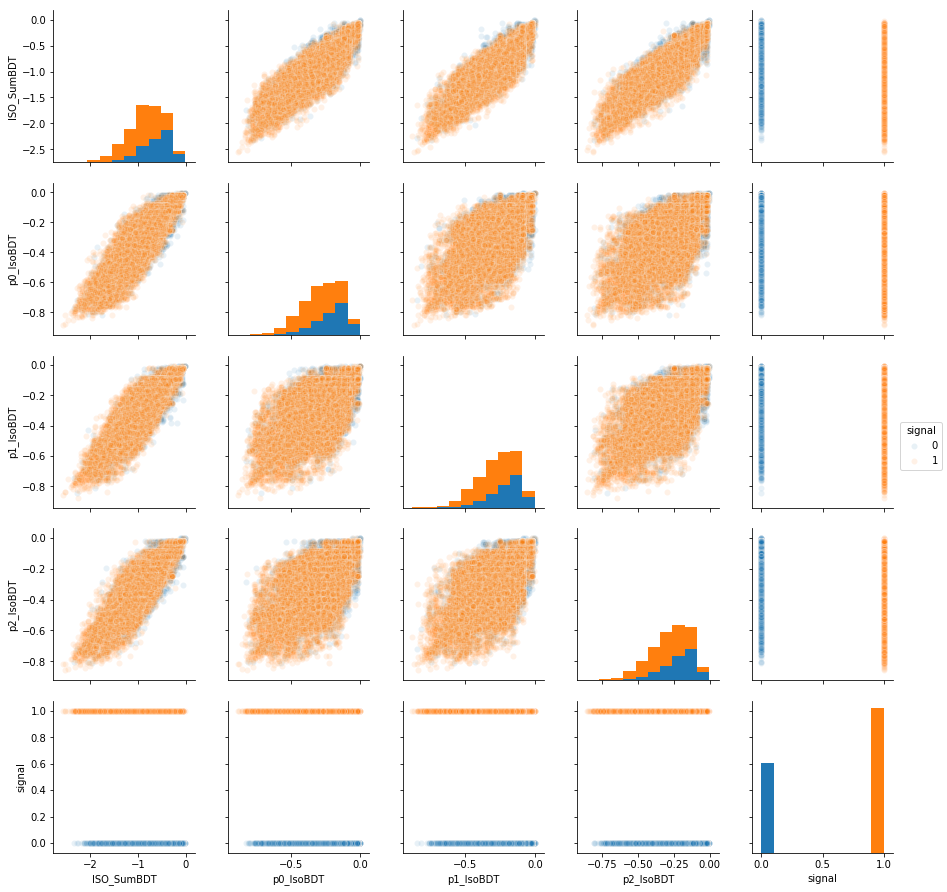

In [20]:
sns.pairplot(data = train[isoBDT_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#they are all positively correlated; specially the SUM-one: ISO_SumBDT

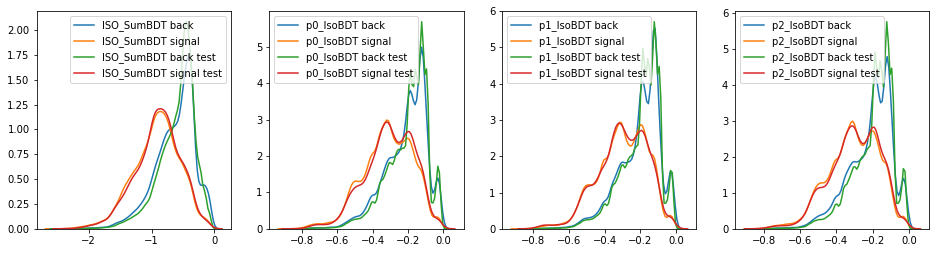

In [41]:
# checking IsoBDT dists
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    sns.kdeplot(data = background[isoBDT_feat[i]], label = isoBDT_feat[i] + ' back')
    sns.kdeplot(data = signal[isoBDT_feat[i]], label = isoBDT_feat[i] + ' signal')
    
    sns.kdeplot(data = background_test[isoBDT_feat[i]], label = isoBDT_feat[i] + ' back test')
    sns.kdeplot(data = signal_test[isoBDT_feat[i]], label = isoBDT_feat[i] + ' signal test')
#signal and background have quite different distributions
#the test data has very similar distribution
#they are also candidate for getting kicked out

In [42]:
train[isoBDT_feat].corr()
#to show the strong correlation

ISO_SumBDT  p0_IsoBDT  p1_IsoBDT  p2_IsoBDT
ISO_SumBDT    1.000000   0.899130   0.901661   0.895327
p0_IsoBDT     0.899130   1.000000   0.721512   0.703533
p1_IsoBDT     0.901661   0.721512   1.000000   0.719612
p2_IsoBDT     0.895327   0.703533   0.719612   1.000000

In [43]:
train[iso_feat].join(train[isoBDT_feat]).corr()
#there is some correlation between iso_feats and isobDT_feat.
#not that strong though. the strongest is between iso and iSO_SumBDT.

isolationa  isolationb  isolationc  isolationd  isolatione  \
isolationa    1.000000    0.476544    0.400257    0.352294    0.321888   
isolationb    0.476544    1.000000    0.424265    0.307741    0.334112   
isolationc    0.400257    0.424265    1.000000    0.299100    0.298122   
isolationd    0.352294    0.307741    0.299100    1.000000    0.597601   
isolatione    0.321888    0.334112    0.298122    0.597601    1.000000   
isolationf    0.317564    0.306244    0.332077    0.541235    0.571446   
iso           0.391462    0.374176    0.366627    0.845191    0.856380   
ISO_SumBDT    0.354301    0.344275    0.328951    0.434924    0.432848   
p0_IsoBDT     0.359060    0.298925    0.274508    0.419840    0.384590   
p1_IsoBDT     0.305485    0.340350    0.284103    0.379005    0.409565   
p2_IsoBDT     0.294005    0.293038    0.332790    0.377418    0.377796   

            isolationf       iso  ISO_SumBDT  p0_IsoBDT  p1_IsoBDT  p2_IsoBDT  
isolationa    0.317564  0.391462    0.354301   0.359060   0.305485   0.294005  
isolationb    0.306244  0.374176    0.344275   0.298925   0.340350   0.293038  
isolationc    0.332077  0.366627    0.328951   0.274508   0.284103   0.332790  
isolationd    0.541235  0.845191    0.434924   0.419840   0.379005   0.377418  
isolatione    0.571446  0.856380    0.432848   0.384590   0.409565   0.377796  
isolationf    1.000000  0.832303    0.430258   0.377415   0.378114   0.408815  
iso           0.832303  1.000000    0.512259   0.466502   0.460439   0.459265  
ISO_SumBDT    0.430258  0.512259    1.000000   0.899130   0.901661   0.895327  
p0_IsoBDT     0.377415  0.466502    0.899130   1.000000   0.721512   0.703533  
p1_IsoBDT     0.378114  0.460439    0.901661   0.721512   1.000000   0.719612  
p2_IsoBDT     0.408815  0.459265    0.895327   0.703533   0.719612   1.000000

In [27]:
pt_feat = ['pt', 'p0_pt','p1_pt','p2_pt'] #transvers momentum of the tau particle and the 3 muons

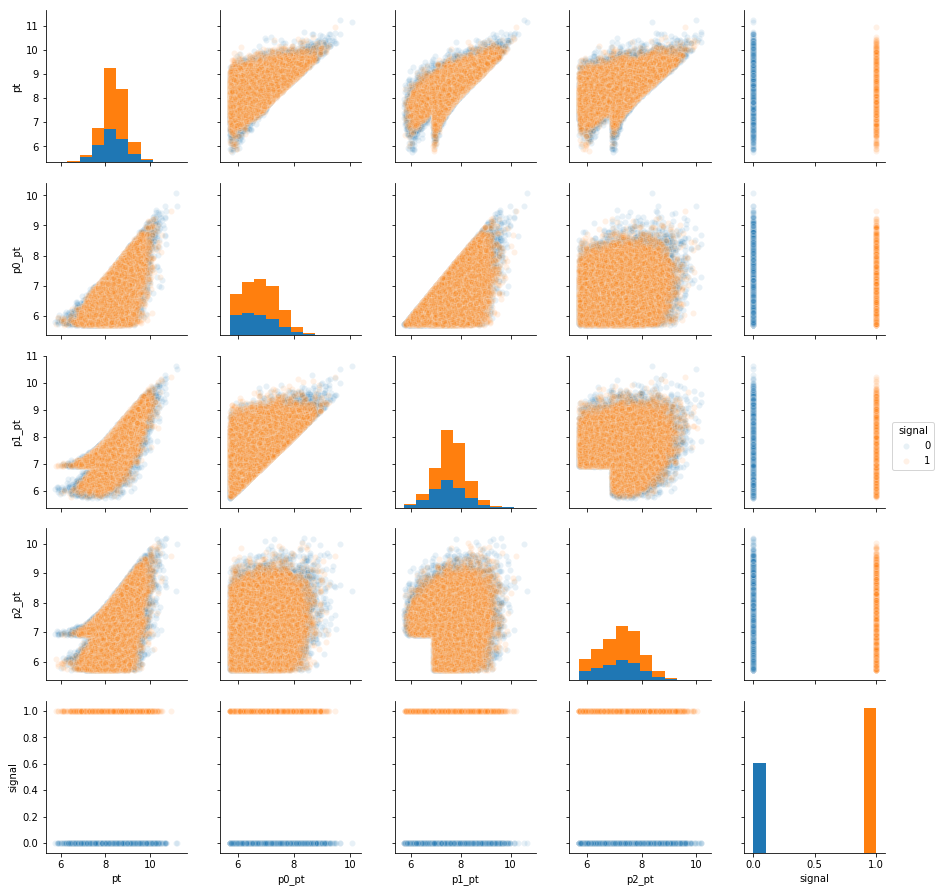

In [44]:
sns.pairplot(data = np.log(train[pt_feat]).join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#the trend is more visible in the log data.
#they are clearly correlated.
#their realtions is generally interesting.
#especially the relation between p1 and others. It's probably the positive one!

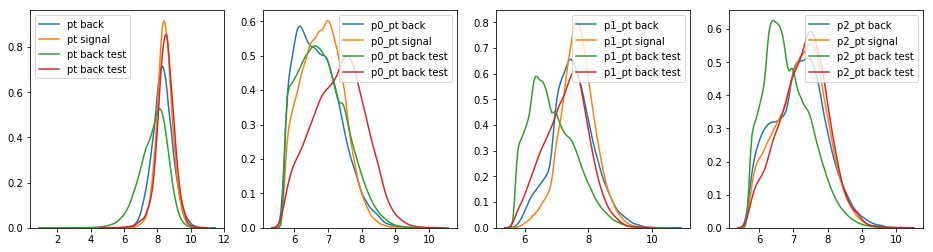

In [46]:
# checking pt dists
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    sns.kdeplot(data = np.log(background[pt_feat[i]]), label = pt_feat[i] + ' back')
    sns.kdeplot(data = np.log(signal[pt_feat[i]]), label = pt_feat[i] + ' signal')
    sns.kdeplot(data = np.log(background_test[pt_feat[i]]), label = pt_feat[i] + ' back test')
    sns.kdeplot(data = np.log(signal_test[pt_feat[i]]), label = pt_feat[i] + ' back test')
#the separation between signal and background is more visible in the muons momenta; especially in the p0.
#again all the dists are the same in the test data
#especially the pi_pt are doing pretty bad

In [48]:
#check out the correlation between them. pt is the most correlated one as it's the parent particle.
train[pt_feat].corr()

pt     p0_pt     p1_pt     p2_pt
pt     1.000000  0.712112  0.814410  0.629960
p0_pt  0.712112  1.000000  0.597752  0.157402
p1_pt  0.814410  0.597752  1.000000  0.126956
p2_pt  0.629960  0.157402  0.126956  1.000000

In [49]:
IP_feat = ['IP', 'p0_IP','p1_IP','p2_IP','IP_p0p2','IP_p1p2']
#impact parameters for the tau particle, the 3 muons and between p0-p2 and p1-p2.

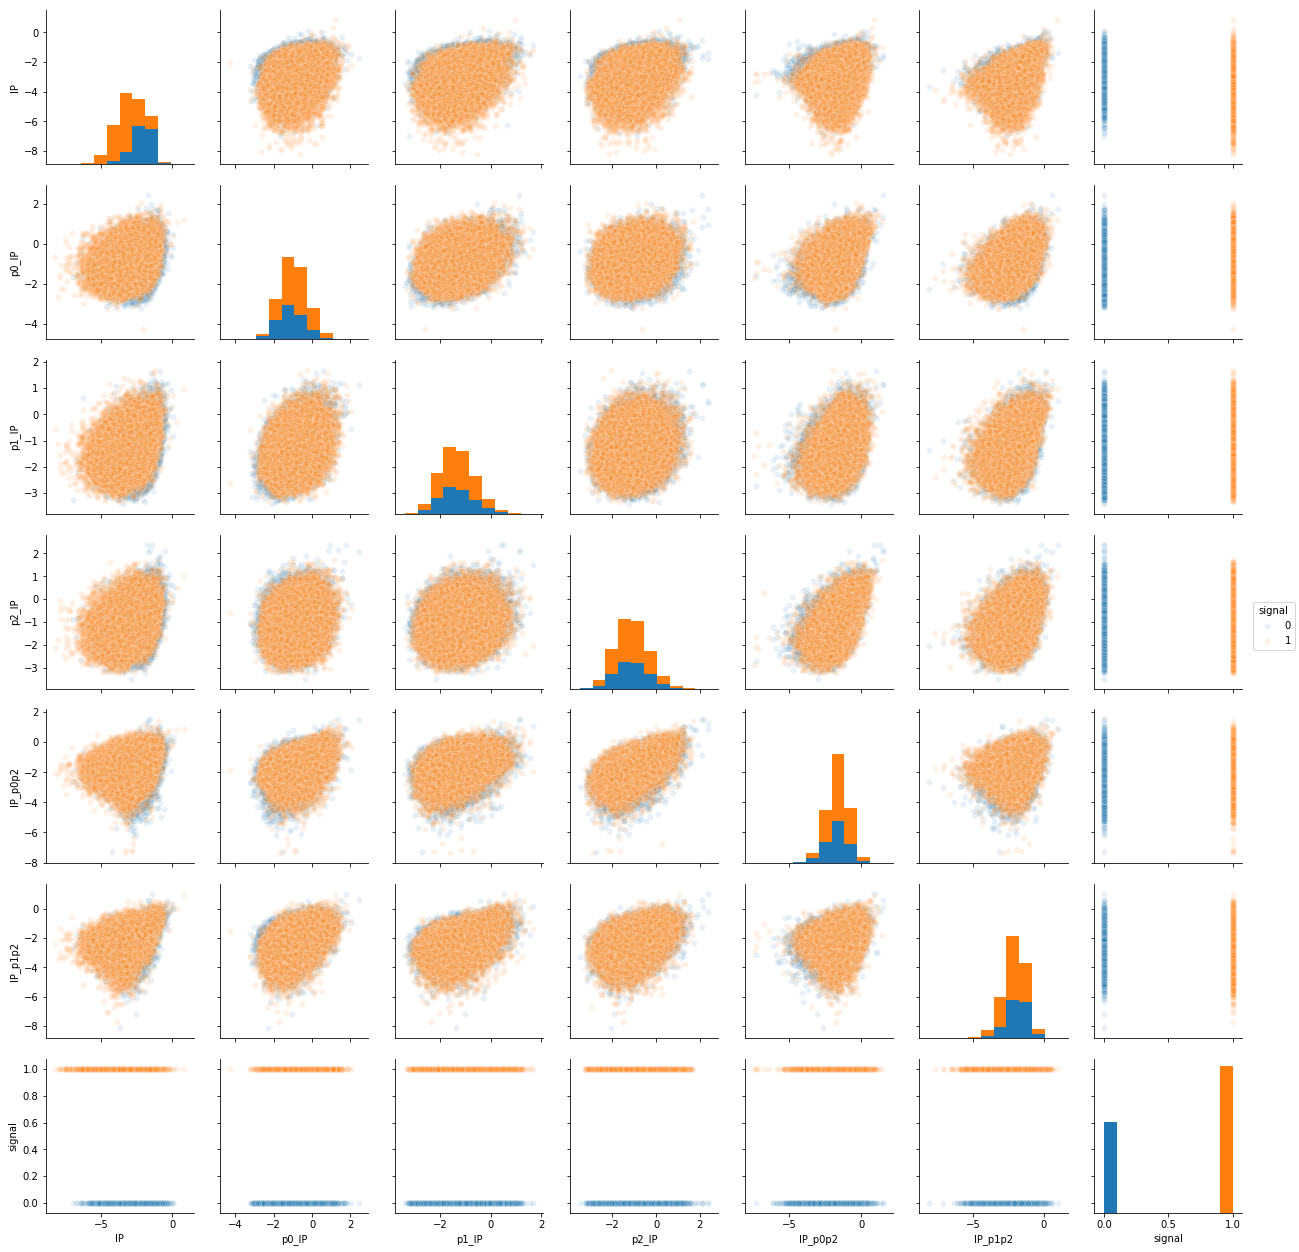

In [50]:
sns.pairplot(data = np.log(train[IP_feat]).join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#again the log works better.
#some correlation is visible.
#there is no clear separation.

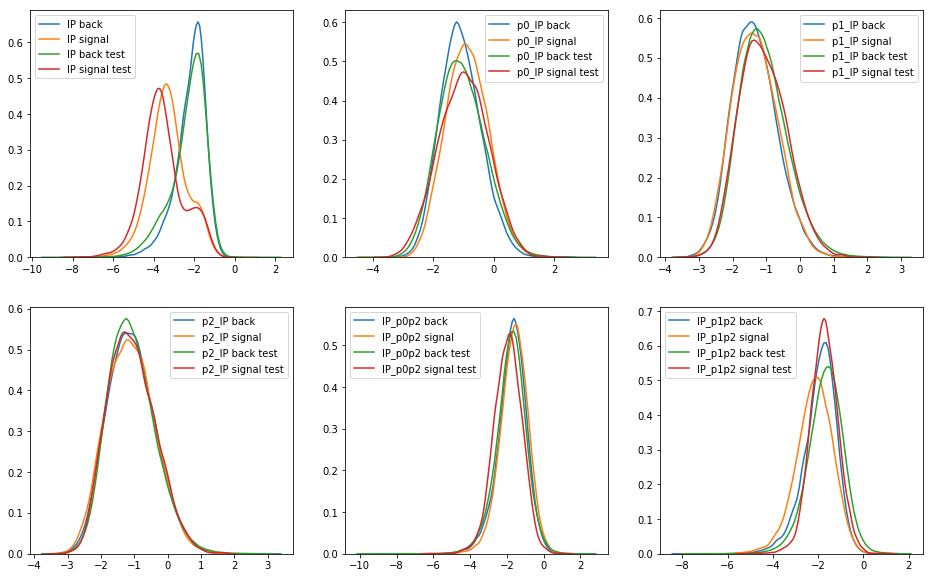

In [52]:
#Check IP_feat dists
plt.figure(figsize=(16,10))
for i in range(6):
    plt.subplot(2,3, i+1)
    sns.kdeplot(data = np.log(background[IP_feat[i]]), label = IP_feat[i] + ' back')
    sns.kdeplot(data = np.log(signal[IP_feat[i]]), label = IP_feat[i] + ' signal')
    sns.kdeplot(data = np.log(background_test[IP_feat[i]]), label = IP_feat[i] + ' back test')
    sns.kdeplot(data = np.log(signal_test[IP_feat[i]]), label = IP_feat[i] + ' signal test')

#using log it can be seen that "IP" has quite different dist for signal and background
#'IP' probably should get kicked out!

In [53]:
train[IP_feat].corr()
#there is some correlation but not very significant

IP     p0_IP     p1_IP     p2_IP   IP_p0p2   IP_p1p2
IP       1.000000  0.192905  0.317642  0.266085  0.286101  0.569004
p0_IP    0.192905  1.000000  0.336865  0.231050  0.471053  0.373773
p1_IP    0.317642  0.336865  1.000000  0.201308  0.352054  0.467425
p2_IP    0.266085  0.231050  0.201308  1.000000  0.628710  0.408527
IP_p0p2  0.286101  0.471053  0.352054  0.628710  1.000000  0.336026
IP_p1p2  0.569004  0.373773  0.467425  0.408527  0.336026  1.000000

In [54]:
IPSig_feat = ['IPSig','p0_IPSig','p1_IPSig','p2_IPSig']
#the siginficance of the impact parameters for the tau particle and the 3 muons.

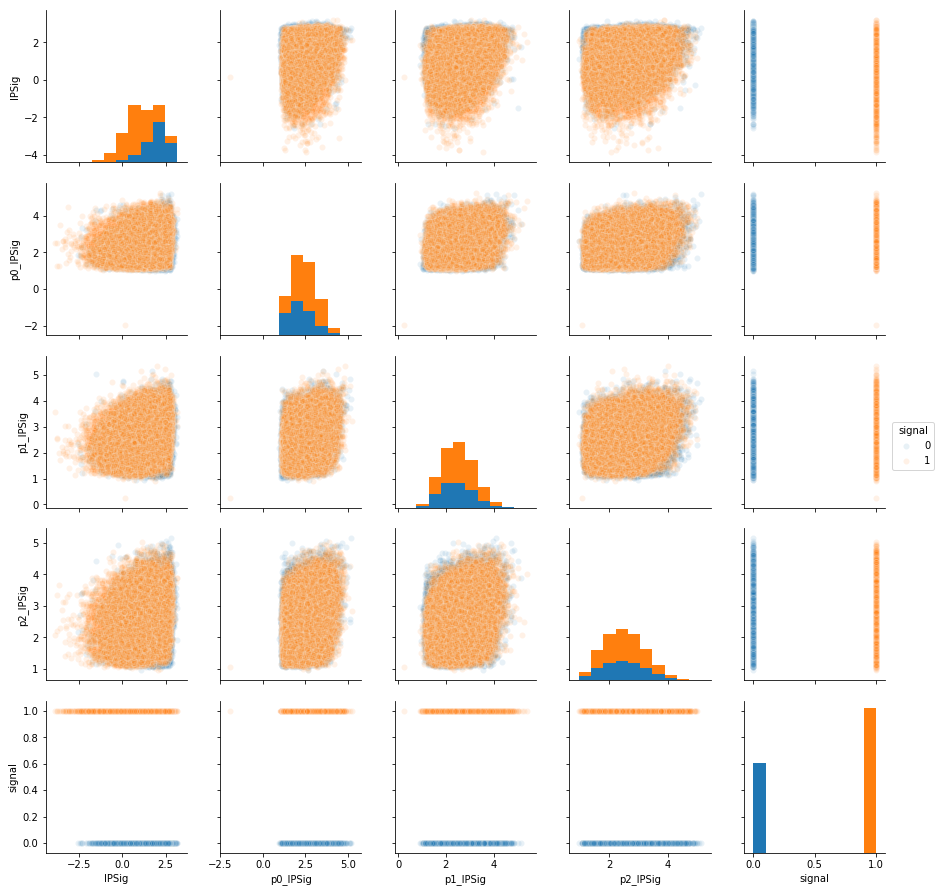

In [55]:
sns.pairplot(data = np.log(train[IPSig_feat]).join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#keep using logs.
#looks like there are couple of outlier data especially in p0_IPSig. they look healthy tho. we'll keep them.
#notice how IPSig is spread towards lower value unlike the others.

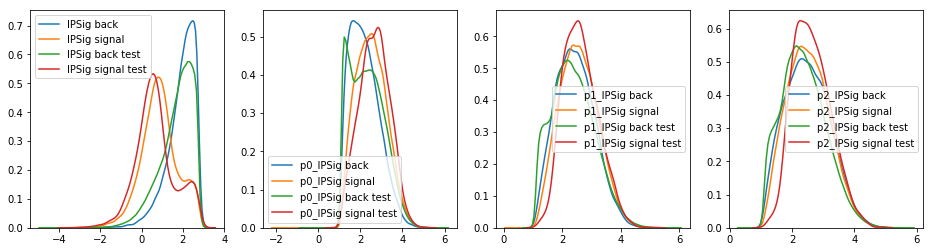

In [57]:
# checking IPSig dists
plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1,4, i+1)
    sns.kdeplot(data = np.log(background[IPSig_feat[i]]), label = IPSig_feat[i] + ' back')
    sns.kdeplot(data = np.log(signal[IPSig_feat[i]]), label = IPSig_feat[i] + ' signal')
    sns.kdeplot(data = np.log(background_test[IPSig_feat[i]]), label = IPSig_feat[i] + ' back test')
    sns.kdeplot(data = np.log(signal_test[IPSig_feat[i]]), label = IPSig_feat[i] + ' signal test')
# again IPSig shows the biggest difference between the signal and the background
#'IPSig' also is doing pretty bad!

In [58]:
train[IPSig_feat].corr()
#check the correlation. It's generally weak.

IPSig  p0_IPSig  p1_IPSig  p2_IPSig
IPSig     1.000000  0.088781  0.204784  0.215327
p0_IPSig  0.088781  1.000000  0.304955  0.295091
p1_IPSig  0.204784  0.304955  1.000000  0.274041
p2_IPSig  0.215327  0.295091  0.274041  1.000000

In [59]:
pm_feat = ['p0_p','p1_p','p2_p'] # muons momenta

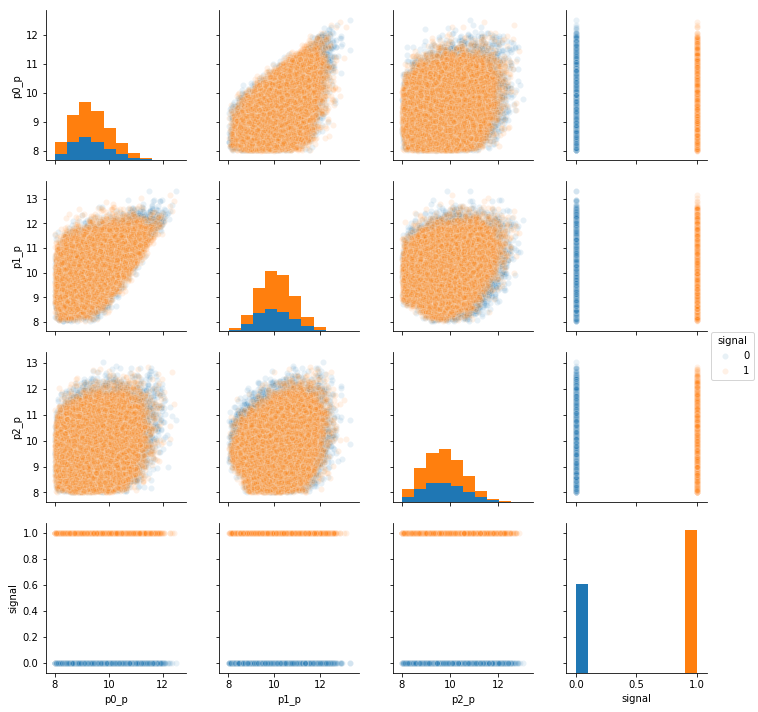

In [60]:
sns.pairplot(data = np.log(train[pm_feat]).join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#keep using log of it
#there is a curious behavior in "p0_p vs. p1_p" plot
#generally no strong correlations

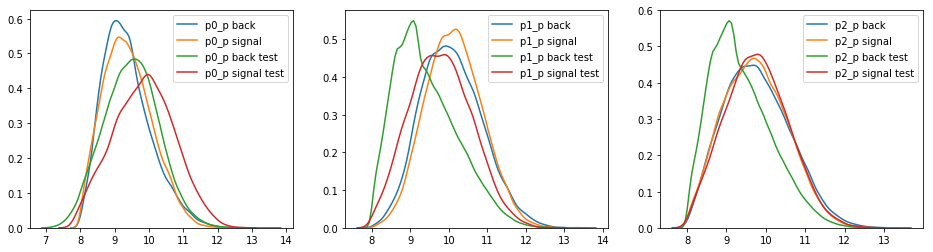

In [62]:
#Check pm dists
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.kdeplot(data = np.log(background[pm_feat[i]]), label = pm_feat[i] + ' back')
    sns.kdeplot(data = np.log(signal[pm_feat[i]]), label = pm_feat[i] + ' signal')
    sns.kdeplot(data = np.log(background_test[pm_feat[i]]), label = pm_feat[i] + ' back test')
    sns.kdeplot(data = np.log(signal_test[pm_feat[i]]), label = pm_feat[i] + ' signal test')
# no significant difference is visible in the signal and background dists
#p1 and p2 are particularly bad

In [63]:
train[pm_feat].corr()
#check the correlation. there is some correlation between p0 and p1

p0_p      p1_p      p2_p
p0_p  1.000000  0.614015  0.252608
p1_p  0.614015  1.000000  0.253915
p2_p  0.252608  0.253915  1.000000

In [64]:
pm_eta_feat = ['p0_eta','p1_eta','p2_eta'] # muons psudorapidity

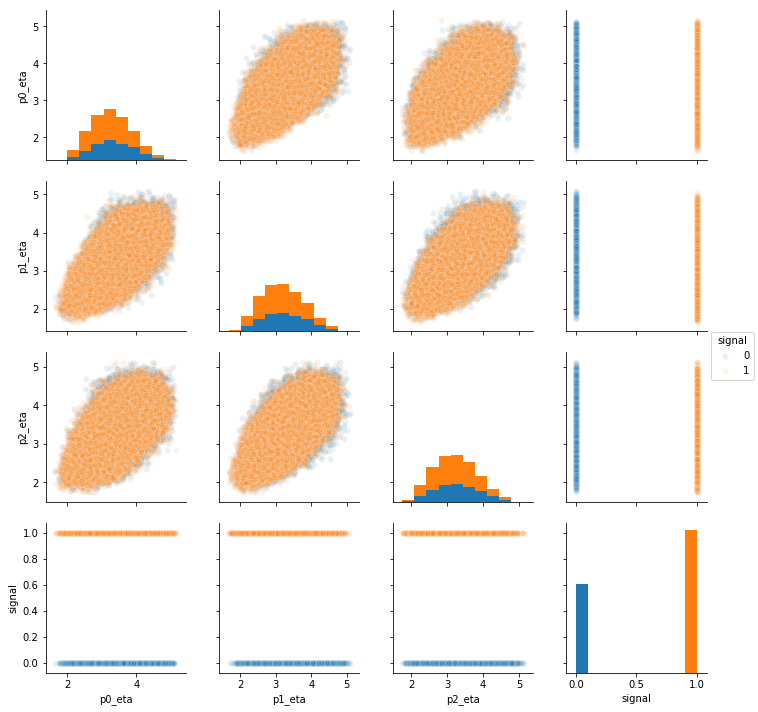

In [65]:
sns.pairplot(data = train[pm_eta_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#use the actual value for rapidity pm_eta.
#there is correlation.
#there is no visible separation.

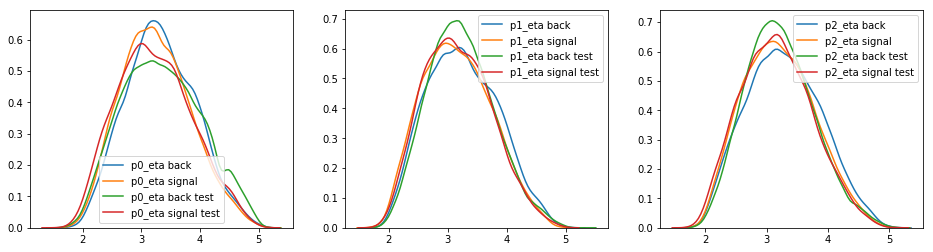

In [66]:
#Check pm_eta dists
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.kdeplot(data = background[pm_eta_feat[i]], label = pm_eta_feat[i]+' back')
    sns.kdeplot(data = signal[pm_eta_feat[i]], label = pm_eta_feat[i]+' signal')
    sns.kdeplot(data = background_test[pm_eta_feat[i]], label = pm_eta_feat[i]+' back test')
    sns.kdeplot(data = signal_test[pm_eta_feat[i]], label = pm_eta_feat[i]+' signal test')
#the dist for signal and the background are not that different.
#looks like the simulation is doing a pretty good job at this one!

In [67]:
#check the correlations
train[pm_eta_feat].corr()
#there is quite significant correlation between rapidities.

p0_eta    p1_eta    p2_eta
p0_eta  1.000000  0.692247  0.619577
p1_eta  0.692247  1.000000  0.694482
p2_eta  0.619577  0.694482  1.000000

In [68]:
DOCA_feat = ['DOCAone','DOCAtwo','DOCAthree']
# Distance of Closest Approach between muon pairs.
#one: (p0,p1), two: (p1,p2), three:(p2,p0)

In [69]:
#there are some outlier data points. let's drop those larger than "1".
train = train[(train['DOCAone']<1)&(train['DOCAtwo']<1)&(train['DOCAthree']<1)]
signal = train[train['signal']==1] #signal labeled events (more cleaned)
background = train[train['signal']==0] #background labeled events (more cleaned)

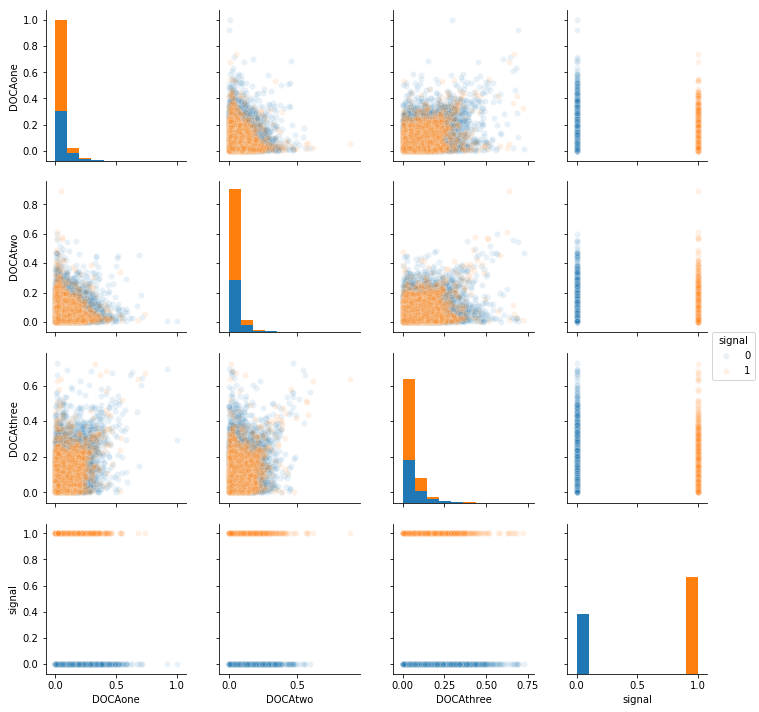

In [70]:
sns.pairplot(data = train[DOCA_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#looks like the background has a longer and thicker tail!

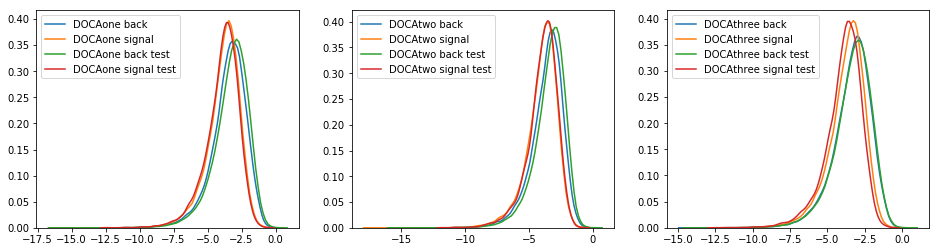

In [72]:
#Check DOCA dists
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.kdeplot(data = np.log(background[DOCA_feat[i]]), label = DOCA_feat[i] + ' back')
    sns.kdeplot(data = np.log(signal[DOCA_feat[i]]), label = DOCA_feat[i] + ' signal')
    sns.kdeplot(data = np.log(background_test[DOCA_feat[i]]), label = DOCA_feat[i] + ' back test')
    sns.kdeplot(data = np.log(signal_test[DOCA_feat[i]]), label = DOCA_feat[i] + ' signal test')
# in the log-dists the thicker tails manifest themselves in shifting the mode of the dists.
# we have to decide which one to use; the data itself or its log.
#this one is probably fine

In [73]:
#check the correlations
train[DOCA_feat].corr()
#there is some correlation; especially between DOCAone and DOCAthree.

DOCAone   DOCAtwo  DOCAthree
DOCAone    1.000000  0.187800   0.479493
DOCAtwo    0.187800  1.000000   0.367108
DOCAthree  0.479493  0.367108   1.000000

In [74]:
track_Q_feat = ['p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof'] # Quality of the muon tracks

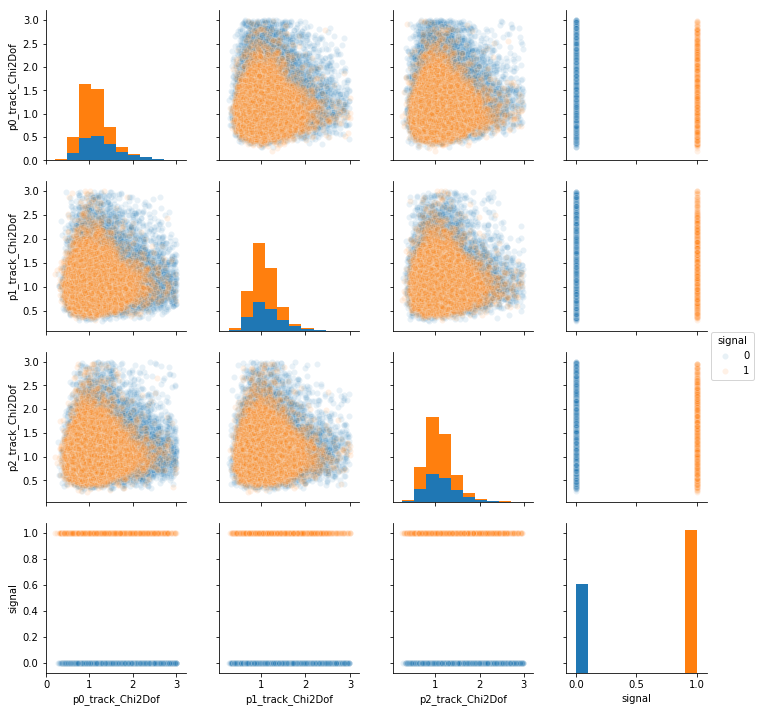

In [75]:
sns.pairplot(data = train[track_Q_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#again evidently the background has thicker and longer tail.

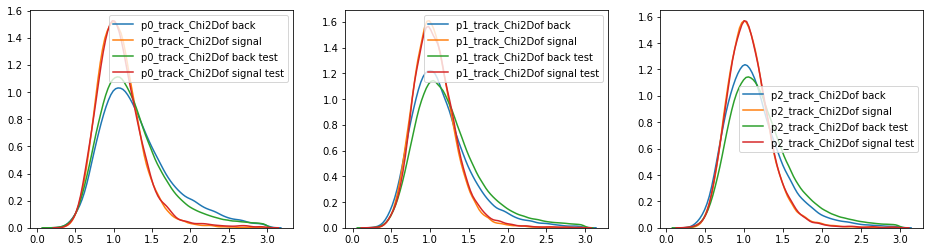

In [77]:
#Check muons_track_Quality dists
plt.figure(figsize=(16,4))
for i in range(3):
    plt.subplot(1,3, i+1)
    sns.kdeplot(data = background[track_Q_feat[i]], label = track_Q_feat[i]+' back')
    sns.kdeplot(data = signal[track_Q_feat[i]], label = track_Q_feat[i]+' signal')
    sns.kdeplot(data = background_test[track_Q_feat[i]], label = track_Q_feat[i]+' back test')
    sns.kdeplot(data = signal_test[track_Q_feat[i]], label = track_Q_feat[i]+' signal test')
#the difference in the tail dists is quite visible
#this is probably fine too

In [78]:
#check the correlations
train[track_Q_feat].corr()
#there is no significant correlation

p0_track_Chi2Dof  p1_track_Chi2Dof  p2_track_Chi2Dof
p0_track_Chi2Dof          1.000000          0.074102          0.070206
p1_track_Chi2Dof          0.074102          1.000000          0.048745
p2_track_Chi2Dof          0.070206          0.048745          1.000000

In [79]:
rest_feat = ['LifeTime', 'FlightDistance','FlightDistanceError', 'dira', 'VertexChi2','SPDhits']
#the rest of the features are about the tau particle except the 'SPDhits'-one which I'm not quite sure about it.

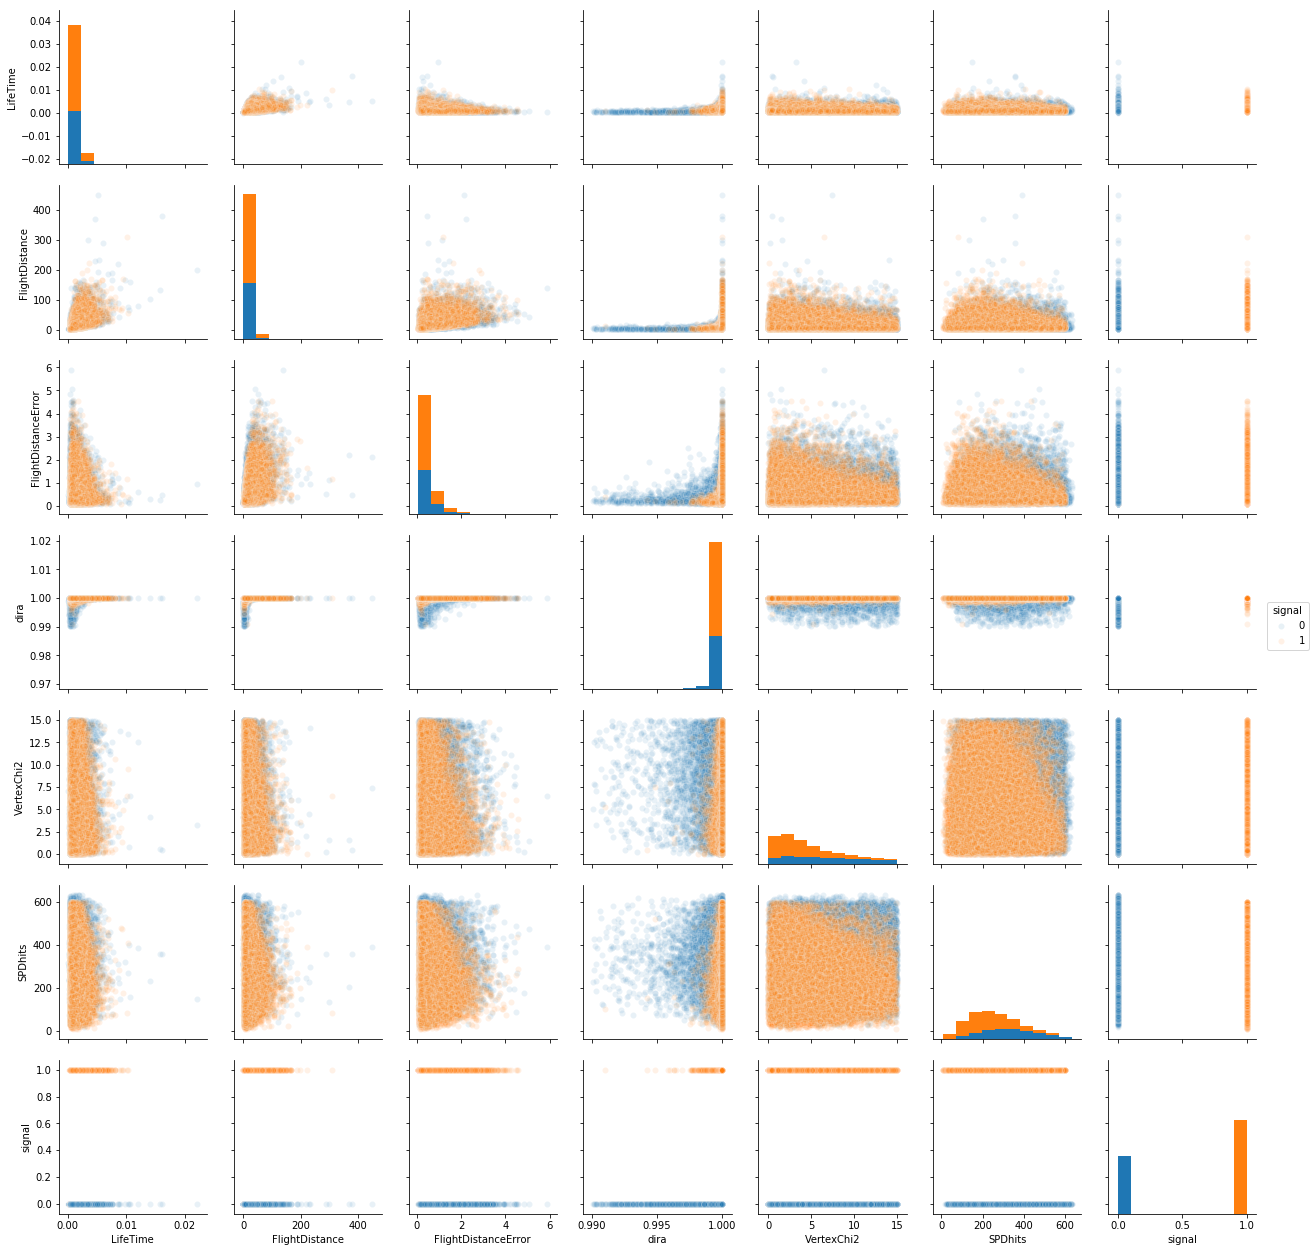

In [80]:
sns.pairplot(data = train[rest_feat].join(train['signal']), hue = 'signal', plot_kws={'alpha':0.1})
#just pairplot the rest of the data against each other.
#generally one can tell that background data is more spread.

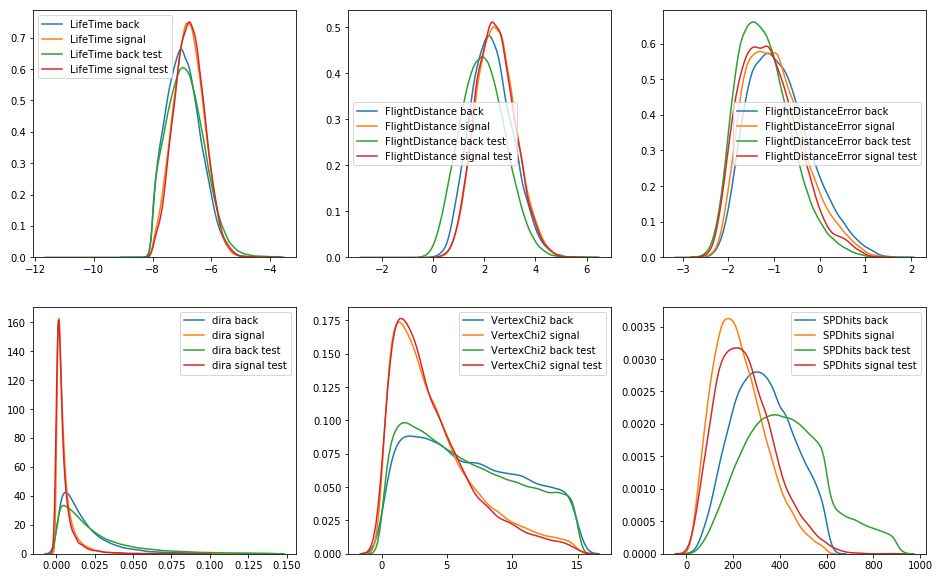

In [83]:
#Check IP_feat dists
plt.figure(figsize=(16,10))
for i in range(3):
    plt.subplot(2,3, i+1)
    sns.kdeplot(data = np.log(background[rest_feat[i]]), label = rest_feat[i]+' back')
    sns.kdeplot(data = np.log(signal[rest_feat[i]]), label = rest_feat[i]+' signal')
    sns.kdeplot(data = np.log(abs(background_test[rest_feat[i]])), label = rest_feat[i]+' back test')
    sns.kdeplot(data = np.log(signal_test[rest_feat[i]]), label = rest_feat[i]+' signal test')

plt.subplot(2,3,4)
sns.kdeplot(np.arccos(background['dira']),gridsize=500, label = 'dira back')
sns.kdeplot(np.arccos(signal['dira']),gridsize=500, label = 'dira signal')
sns.kdeplot(np.arccos(background_test['dira']),gridsize=500, label = 'dira back test')
sns.kdeplot(np.arccos(signal_test['dira']),gridsize=500, label = 'dira signal test')

plt.subplot(2,3,5)
sns.kdeplot(background['VertexChi2'], label = 'VertexChi2 back')
sns.kdeplot(signal['VertexChi2'], label = 'VertexChi2 signal')
sns.kdeplot(background_test['VertexChi2'], label = 'VertexChi2 back test')
sns.kdeplot(signal_test['VertexChi2'], label = 'VertexChi2 signal test')

plt.subplot(2,3,6)
sns.kdeplot(background['SPDhits'], label = 'SPDhits back')
sns.kdeplot(signal['SPDhits'], label = 'SPDhits signal')
sns.kdeplot(background_test['SPDhits'], label = 'SPDhits back test')
sns.kdeplot(signal_test['SPDhits'], label = 'SPDhits signal test')

# for the first top plots we used log. they are actually and naturally correlated.
# for the 'dira' variable which is a cosine of some small angle, we used arccosine. the background is visibly more spread.
# the 'VertexChi2' and 'SPDhits' are clearly good separaters between signal and the background.
# we should probably kick out the 'SPDhits' and 'VertexChi2' as well

In [85]:
#check the correlations
train[rest_feat].corr()
#naturally there is some correlation between "LifeTine and FlightDistance" and "FlightDistance and its Error"
#other than that correlations are weak

LifeTime  FlightDistance  FlightDistanceError      dira  \
LifeTime             1.000000        0.579552             0.022235  0.138044   
FlightDistance       0.579552        1.000000             0.554602  0.173771   
FlightDistanceError  0.022235        0.554602             1.000000  0.098061   
dira                 0.138044        0.173771             0.098061  1.000000   
VertexChi2          -0.066352       -0.055417             0.015694 -0.158100   
SPDhits             -0.054268       -0.020318             0.033310 -0.094682   

                     VertexChi2   SPDhits  
LifeTime              -0.066352 -0.054268  
FlightDistance        -0.055417 -0.020318  
FlightDistanceError    0.015694  0.033310  
dira                  -0.158100 -0.094682  
VertexChi2             1.000000  0.147307  
SPDhits                0.147307  1.000000

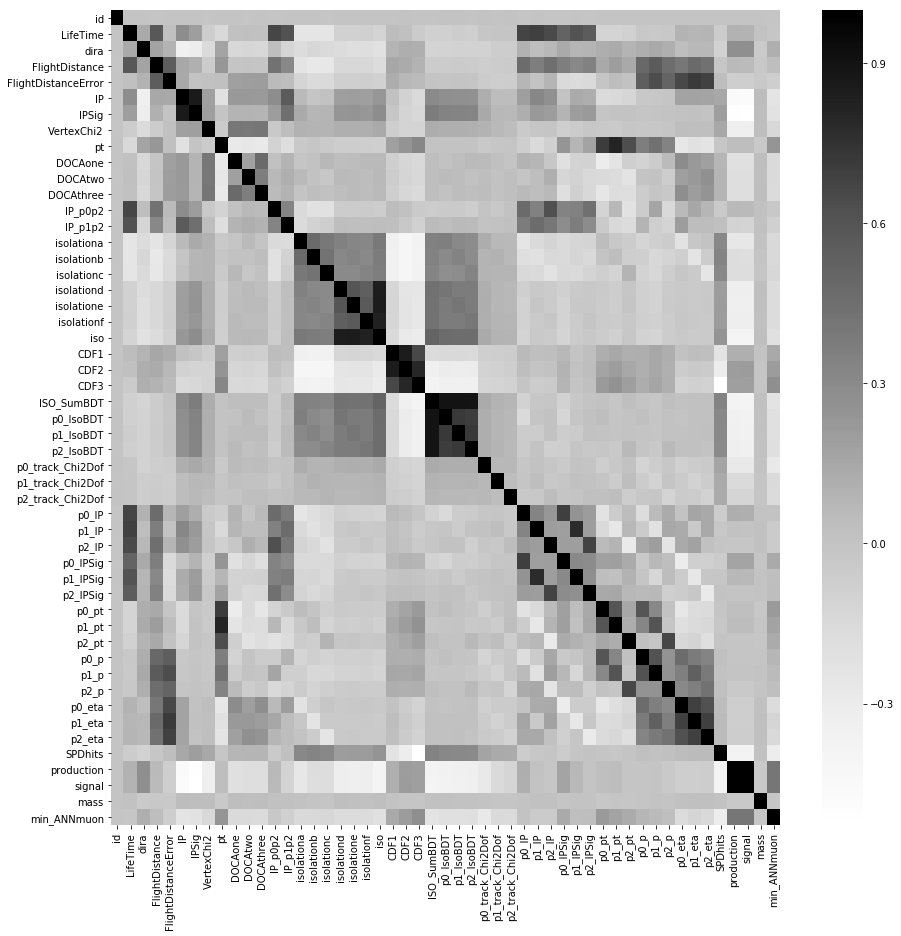

In [87]:
#to have a general picture how the features are correlated and grouped.
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(),cmap='Greys')

# feature engineering

In [69]:
# logged features
loged_feat = ['LifeTime','FlightDistance','FlightDistanceError', 'pt', 'DOCAone', 'p0_IP', 'IPSig', 'IP',
              'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'p1_IP', 'p2_IP', 'p0_IPSig',
              'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p']
# I'm dropping ... 

# not logged feature
feat = ['VertexChi2', 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 'iso', 
        'CDF1', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 
        'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_eta', 'p1_eta', 'p2_eta']
#I dropped the 'SPDhits',

#In order to pass the "KS Agreement Test" we are dropping some of the features that are not well simulated

### modify some of the features and form a modified feature vector

In [70]:
# building modified feature vectors
X0 = train[feat] # not loggd features
X_log = np.log(train[loged_feat]) # logged features
X_d = np.arccos(train['dira'])

X = X0.join(X_log).join(X_d)
y = train['signal']

#### apply it on the check agreement test data

In [71]:
# apply the feature engineering
X_ag_0 = agree[feat] # not loggd features
X_ag_log = np.log(abs(agree[loged_feat])) # logged features
X_ag_d = np.arccos(agree['dira'])

X_ag = X_ag_0.join(X_ag_log).join(X_ag_d) # the final check agreement feature vector

#### apply it on the check correlation test data

In [72]:
# apply the feature engineering
X_corr_0 = corr[feat] # not loggd features
X_corr_log = np.log(corr[loged_feat]) # logged features
X_corr_d = np.arccos(corr['dira'])

X_corr = X_corr_0.join(X_corr_log).join(X_corr_d) # the final check agreement feature vector

#### a module to normalize the feature vector

In [73]:
scaler = StandardScaler() # initiate the normalizer

scaler.fit(X)
X = scaler.transform(X) # apply on the training data

scaler.fit(X_ag)
X_ag = scaler.transform(X_ag) # apply on the agreement test data

scaler.fit(X_corr)
X_corr = scaler.transform(X_corr) # apply on the correlation test data

** split the training data to "test and train" to validate models before applying them to the actual test data **

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Evaluate the performance of a "Support Vector Machine"

0.98773962164679019

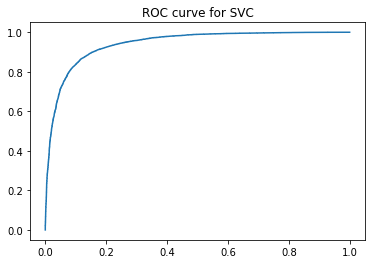

In [94]:
svc = SVC(probability=True, kernel='rbf')
svc.fit(X_train, y_train)

pred_svc = svc.predict_proba(X_test)[:, 1]

fpr_svc, tpr_svc, thresholds_svc = evaluation.roc_curve(y_test, pred_svc)
plt.plot(fpr_svc, tpr_svc)
plt.title('ROC curve for SVC')

evaluation.roc_auc_truncated(y_test, pred_svc)

### Check if the model pass the "Agreement Test"

In [95]:
# apply the model on the "check_agreement" data
agreement_probs_svc = svc.predict_proba(X_ag)[:, 1]

# compute and print the result of the Kolmogorov–Smirnov test
ks = evaluation.compute_ks(
    agreement_probs_svc[agree['signal'].values == 0],
    agreement_probs_svc[agree['signal'].values == 1],
    agree[agree['signal'] == 0]['weight'].values,
    agree[agree['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)

KS metric 0.0232588231127 True


### Check if the model pass the "Correlation Test"

In [96]:
# apply the model on the "check_correlation" data
correlation_probs_svc = svc.predict_proba(X_corr)[:, 1]

# compute and print the result of the correlation test
cvm = evaluation.compute_cvm(correlation_probs_svc, corr['mass'])
print('CvM metric', cvm, cvm < 0.002) 

CvM metric 0.000919380099011 True


## Evaluate the performance of a "Random Forest Classifier"

0.98547309717504339

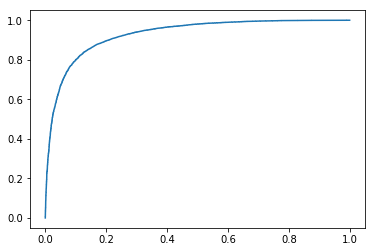

In [85]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_leaf=12, criterion='entropy', random_state=11)
rf.fit(X_train, y_train)
pred_rf = rf.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = evaluation.roc_curve(y_test, pred_rf)
plt.plot(fpr_rf, tpr_rf)

evaluation.roc_auc_truncated(y_test, pred_rf)

### Check if the model pass the "Agreement Test"

In [86]:
# apply the model on the "check_agreement" data
agreement_probs_rf = rf.predict_proba(X_ag)[:, 1]

# compute and print the result of the Kolmogorov–Smirnov test
ks = evaluation.compute_ks(
    agreement_probs_rf[agree['signal'].values == 0],
    agreement_probs_rf[agree['signal'].values == 1],
    agree[agree['signal'] == 0]['weight'].values,
    agree[agree['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)

KS metric 0.0537331134082 True


### Check if the model pass the "Correlation Test"

In [87]:
# apply the model on the "check_correlation" data
correlation_probs_rf = rf.predict_proba(X_corr)[:, 1]

# compute and print the result of the correlation test
cvm = evaluation.compute_cvm(correlation_probs_rf, corr['mass'])
print('CvM metric', cvm, cvm < 0.002) 

CvM metric 0.00106856709828 True


## Evaluate the performance of a "Gradient Boosting Classifier"

0.99005205897536874

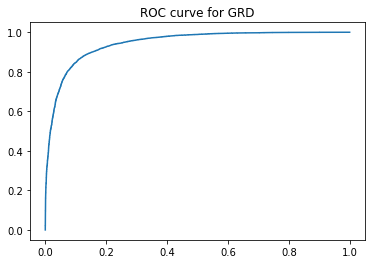

In [82]:
# initiate the model
# one has to play with the parameters of the model to achive the best performance
grd = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.03, subsample=0.7,
                                      min_samples_leaf=12, max_depth=10, random_state=11)
# fit the model to the training data
grd.fit(X_train, y_train)
# used the trained model to predict probabilistic prediction for the test data
pred_grd = grd.predict_proba(X_test)[:,1]

# plot the ROC curve
fpr_grd, tpr_grd, thresholds_grd = evaluation.roc_curve(y_test, pred_grd)
plt.plot(fpr_grd, tpr_grd)
plt.title('ROC curve for GRD')

# use the weighted roc_auc provided by the designer of the competetion to calculate the score achieved by the model
evaluation.roc_auc_truncated(y_test, pred_grd)

### Check if the model pass the "Agreement Test"

In [83]:
# apply the model on the "check_agreement" data
agreement_probs_grd = grd.predict_proba(X_ag)[:, 1]

# compute and print the result of the Kolmogorov–Smirnov test
ks = evaluation.compute_ks(
    agreement_probs_grd[agree['signal'].values == 0],
    agreement_probs_grd[agree['signal'].values == 1],
    agree[agree['signal'] == 0]['weight'].values,
    agree[agree['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)

KS metric 0.0649671981354 True


### Check if the model pass the "Correlation Test"

In [84]:
# apply the model on the "check_correlation" data
correlation_probs_grd = grd.predict_proba(X_corr)[:, 1]

# compute and print the result of the correlation test
cvm = evaluation.compute_cvm(correlation_probs_grd, corr['mass'])
print('CvM metric', cvm, cvm < 0.002) 

CvM metric 0.00102680699078 True


# The "Gradient Boosting Classifier" does the best. We choose it to apply on the actual "Test data".

In [204]:
# logged features
loged_feat = ['LifeTime','FlightDistance','FlightDistanceError', 'pt', 'DOCAone', 'p0_IP', 'IPSig', 'IP',
              'DOCAtwo', 'DOCAthree', 'IP_p0p2', 'IP_p1p2', 'p1_IP', 'p2_IP', 'p0_IPSig',
              'p1_IPSig', 'p2_IPSig', 'p0_pt', 'p1_pt', 'p2_pt', 'p0_p', 'p1_p', 'p2_p']
# I'm dropping ... 

# not logged feature
feat = ['VertexChi2', 'isolationa', 'isolationb', 'isolationc', 'isolationd', 'isolatione', 'isolationf', 'iso', 
        'CDF1', 'CDF2', 'CDF3', 'ISO_SumBDT', 'p0_IsoBDT', 'p1_IsoBDT', 'p2_IsoBDT', 
        'p0_track_Chi2Dof', 'p1_track_Chi2Dof', 'p2_track_Chi2Dof', 'p0_eta', 'p1_eta', 'p2_eta']
#I dropped the 'SPDhits',

#In order to pass the "KS Agreement Test" we are dropping some of the features that are not well simulated

In [210]:
# building modified feature vectors
X0 = train[feat] # not loggd features
X_log = np.log(train[loged_feat]) # logged features
X_d = np.arccos(train['dira'])

X_train = X0.join(X_log).join(X_d)
y_train = train['signal']

In [212]:
# biuld the modified test data
test.at[8859147,'DOCAone'] = 1*10**(-7) # to avoid log(0) warning!
X_test_0 = test[feat] # not loggd features
X_test_log = np.log(abs(test[loged_feat])) # logged features
X_test_d = np.arccos(test['dira'])

X_test = X_test_0.join(X_test_log).join(X_test_d)

#### apply it on the check agreement test data

In [213]:
# apply the feature engineering
X_ag_0 = agree[feat] # not loggd features
X_ag_log = np.log(abs(agree[loged_feat])) # logged features
X_ag_d = np.arccos(agree['dira'])

X_ag = X_ag_0.join(X_ag_log).join(X_ag_d) # the final check agreement feature vector

#### apply it on the check correlation test data

In [214]:
# apply the feature engineering
X_corr_0 = corr[feat] # not loggd features
X_corr_log = np.log(corr[loged_feat]) # logged features
X_corr_d = np.arccos(corr['dira'])

X_corr = X_corr_0.join(X_corr_log).join(X_corr_d) # the final check agreement feature vector

#### a module to normalize the feature vector

In [215]:
scaler = StandardScaler() # initiate the normalizer

scaler.fit(X_train)
X_train = scaler.transform(X_train) # apply on the training data

scaler.fit(X_test)
X_test = scaler.transform(X_test) # apply on the test data

scaler.fit(X_ag)
X_ag = scaler.transform(X_ag) # apply on the agreement test data

scaler.fit(X_corr)
X_corr = scaler.transform(X_corr) # apply on the correlation test data

In [222]:
# initiate the model
# one has to play with the parameters of the model to achive the best performance
grd = GradientBoostingClassifier(n_estimators=700, learning_rate=0.03, subsample=0.7,
                                      min_samples_leaf=12, max_depth=10, random_state=11)
# fit the model to the training data
grd.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=10,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=12, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=700,
              presort='auto', random_state=11, subsample=0.7, verbose=0,
              warm_start=False)

### Check if the model pass the "Agreement Test"

In [223]:
# apply the model on the "check_agreement" data
agreement_probs_grd = grd.predict_proba(X_ag)[:, 1]

# compute and print the result of the Kolmogorov–Smirnov test
ks = evaluation.compute_ks(
    agreement_probs_grd[agree['signal'].values == 0],
    agreement_probs_grd[agree['signal'].values == 1],
    agree[agree['signal'] == 0]['weight'].values,
    agree[agree['signal'] == 1]['weight'].values)
print('KS metric', ks, ks < 0.09)

KS metric 0.085699586792 True


### Check if the model pass the "Correlation Test"

In [224]:
# apply the model on the "check_correlation" data
correlation_probs_grd = grd.predict_proba(X_corr)[:, 1]

# compute and print the result of the correlation test
cvm = evaluation.compute_cvm(correlation_probs_grd, corr['mass'])
print('CvM metric', cvm, cvm < 0.002) 

CvM metric 0.00103388883284 True


In [225]:
# Apply the model on the test data to find the prediction
result = pd.DataFrame({'id': test.index})
result['prediction'] = grd.predict_proba(X_test)[:, 1]

In [226]:
# write the prediction into the output file.
# to be submitted for the competition.
result.to_csv('grd_prediction.csv', index=False, sep=',')